In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# Find last date in database

Last_Date = session.query(func.max(Measurement.date)).all()

Last_Date

[('2017-08-23')]

In [12]:
# Last Date of observation all the way back through 12 months

Last_Year_Observation = dt.date(2017, 8, 23) - dt.timedelta(days=7*52)

Last_Year_Observation

datetime.date(2016, 8, 24)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

results = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > Last_Year_Observation).all()

In [14]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results)

df.columns =  results[0].keys()

df.set_index('date',inplace = True)

# Sort the dataframe by date

df_sorted = df.sort_values('date')

df_sorted.head(10)

,prcp
date,
2016-08-25,0.08
2016-08-25,0.00
2016-08-25,0.06
2016-08-25,0.00
2016-08-25,0.08
2016-08-25,0.11
2016-08-25,0.21
2016-08-26,0.00
2016-08-26,0.00


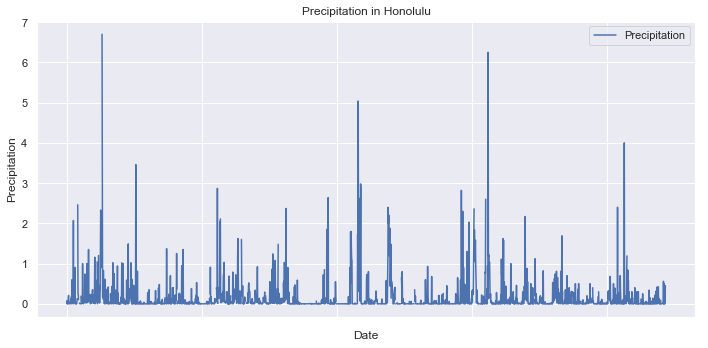

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data

sns.set()

plot1 = df_sorted.plot(figsize = (10, 5))

fig = plot1.get_figure()

plt.title('Precipitation in Honolulu')

plt.xlabel('Date')

plt.ylabel('Precipitation')

plt.legend(["Precipitation"],loc="best")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Summary_Stats_DF = df_sorted.describe()

Summary_Stats_DF.rename(columns = {'prcp' : 'Precipitation'})

,Precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [17]:
# Setting the dataframe for Station
results_station = session.query(Station.latitude,Station.longitude,Station.id,Station.elevation,Station.station,Station.name).all()

df_stations = pd.DataFrame(results_station)

df_stations.head()

,latitude,longitude,id,elevation,station,name
0,21.2716,-157.8168,1,3.0,USC00519397,"WAIKIKI 717.2, HI US"
1,21.4234,-157.8015,2,14.6,USC00513117,"KANEOHE 838.1, HI US"
2,21.5213,-157.8374,3,7.0,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,21.3934,-157.9751,4,11.9,USC00517948,"PEARL CITY, HI US"
4,21.4992,-158.0111,5,306.6,USC00518838,"UPPER WAHIAWA 874.3, HI US"


In [18]:
# Design a query to show how many stations are available in this dataset?
Number_of_Stations = session.query(Station.station).count()
 
print(f"Available Station(s): {Number_of_Stations}")

Available Station(s): 9


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?

Active_Stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

# List the stations and the counts in descending order.

Active_Stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

Station_Name = session.query(Station.name).filter(Station.station == Active_Stations[0][0]).all() 

print(Station_Name)

Temp_Stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
             filter(Station.station == Active_Stations[0][0]).all()

print(Temp_Stats)

[('WAIHEE 837.5, HI US',)]
[(53.0, 87.0, 73.09795396419437)]


In [21]:
# Choose the station with the highest number of temperature observations.

Station_Name = session.query(Station.name).filter(Station.station == Active_Stations[0][0]).all() 

print(Station_Name)

[('WAIHEE 837.5, HI US',)]


In [22]:
# Query the last 12 months of temperature observation data for this station 

results_WAIHEE = session.query(Measurement.date,Measurement.tobs).filter(Measurement.date > Last_Year_Observation).\
                            filter(Station.station == Active_Stations[0][0]).all()

results_WAIHEE_df = pd.DataFrame(results_WAIHEE)

results_WAIHEE_df.head()

,date,tobs
0,2016-08-25,80.0
1,2016-08-26,79.0
2,2016-08-27,77.0
3,2016-08-28,78.0
4,2016-08-29,78.0


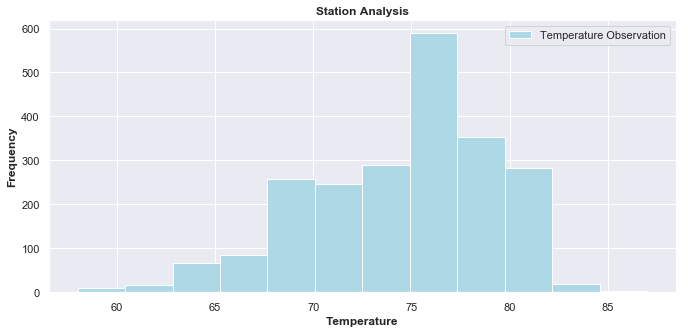

In [23]:
# Plot the results as a histogram

sns.set()

plt.figure(figsize=(10,5))

plt.hist(results_WAIHEE_df['tobs'],bins=12,color='lightblue')

plt.xlabel('Temperature',weight='bold')

plt.ylabel('Frequency',weight='bold')

plt.title('Station Analysis',weight='bold')

plt.legend(["Temperature Observation"],loc="best")


plt.show()

![precipitation](Images/station-histogram.png)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results = calc_temps('2017-07-02', '2017-08-13')
trip_results

[(69.0, 78.63485477178423, 87.0)]

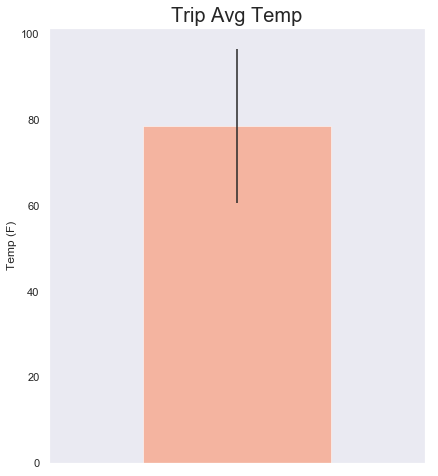

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_df = pd.DataFrame(trip_results, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = trip_df['Avg Temp']
min_max_temp = trip_df.iloc[0]['Max Temp'] - trip_df.iloc[0]['Min Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(6,8), alpha=0.5, color='coral')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)")
plt.xticks([])
plt.grid()
plt.show()

In [27]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
q = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= '2017-07-02')\
.filter(Measurement.date <= '2017-08-13')\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

print()
print (f"Historical Rainfall Per Weather Station - Descending order\n  Trip Dates: \
'2017-07-02' - '2017-08-13'")
print()
for row in q:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()


Historical Rainfall Per Weather Station - Descending order
  Trip Dates: '2017-07-02' - '2017-08-13'

Station:  USC00516128
    Rainfall:  15.43  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00519281
    Rainfall:  3.69  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00514830
    Rainfall:  2.76  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374

Station:  USC00513117
    Rainfall:  2.10  
    Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station:  USC00519523
    Rainfall:  0.51  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5      Latitude:  21.33556  Longitude:  -157.71139

Station:  USC00519397
    Rainfall:  0.44  
    Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0

## Optional Challenge Assignment

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [29]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [30]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [31]:
# Plot the daily normals as an area plot with `stacked=False`
